#                                                  ICT_usage_in_institutions
##                                       Data preprosessing Visalization and analysis

### Renaming Columns: Long and complex column names are replaced with short, clear English names (such as Comp_Usage, Fiber_Optic, xDSL, etc.) to make them easier to use during analysis.
### Cleaning Data Types:

### pd.to_numeric: Non-numeric characters in the columns (for example, “-”) are removed and the values are converted into numeric format.

### .fillna(0): Missing values are filled with 0 to prevent errors in mathematical calculations.

### Indexing: The Year column is converted to integer (int) format and defined as the main reference for time series analysis.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mussislrd-ikt-dn-istifadnin-sas-gostricilri-dt_cc_003.csv')
df = df.drop(columns=['Unnamed: 1'])
column_rename_dict = {
    df.columns[0]: 'Year',
    df.columns[1]: 'Comp_Usage_Firm',     
    df.columns[2]: 'Comp_Usage_Staff',    
    df.columns[3]: 'Net_Usage_Firm',    
    df.columns[4]: 'Net_Usage_Staff',     
    df.columns[5]: 'Web_Page',
    df.columns[6]: 'ICT_Net_Total',     
    df.columns[7]: 'LAN',               
    df.columns[8]: 'Intranet',          
    df.columns[9]: 'Extranet',            
    df.columns[10]: 'Leased_Line',        
    df.columns[11]: 'Conn_Type_Total',   
    df.columns[12]: 'Cable_Modem',       
    df.columns[13]: 'xDSL',               
    df.columns[14]: 'ISDN',              
    df.columns[15]: 'Fiber_Optic',       
    df.columns[16]: 'Fixed_Wireless',     
    df.columns[17]: 'Wireless_Other',     
    df.columns[18]: 'Satellite_Mobile',  
    df.columns[19]: 'Mobile_Data'
}
df = df.rename(columns=column_rename_dict)
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df['Year'] = df['Year'].astype(int)
df.set_index(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              20 non-null     int64  
 1   Comp_Usage_Firm   20 non-null     float64
 2   Comp_Usage_Staff  20 non-null     float64
 3   Net_Usage_Firm    20 non-null     float64
 4   Net_Usage_Staff   20 non-null     float64
 5   Web_Page          20 non-null     float64
 6   ICT_Net_Total     20 non-null     float64
 7   LAN               20 non-null     float64
 8   Intranet          20 non-null     float64
 9   Extranet          20 non-null     float64
 10  Leased_Line       20 non-null     float64
 11  Conn_Type_Total   20 non-null     float64
 12  Cable_Modem       20 non-null     float64
 13  xDSL              20 non-null     float64
 14  ISDN              20 non-null     float64
 15  Fiber_Optic       20 non-null     float64
 16  Fixed_Wireless    20 non-null     float64
 17 

AttributeError: 'Axes' object has no attribute 'gca'

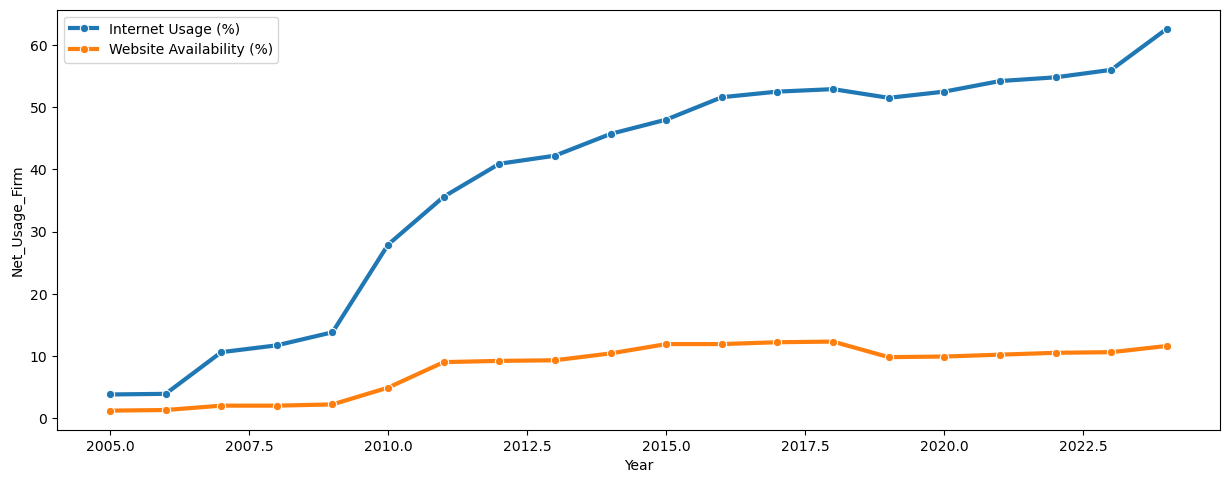

In [52]:

fig = plt.figure(figsize=(15, 12))

ax1=plt.subplot2grid((2,2), (0,0), colspan=2)

sns.lineplot(data=df, x='Year', y='Net_Usage_Firm', label='Internet Usage (%)', marker='o', linewidth=3)
sns.lineplot(data=df, x='Year', y='Web_Page', label='Website Availability (%)', marker='o', linewidth=3)

ax1.set_title('Got the Internet, but no website?', fontsize=14)
ax1.set_ylabel('Persentage (%)')
ax1.set_xticks(df['Year'])
ax1.set_xticklabels(df[Year])
ax1.grid(True, alpha=0.3)
ax1.legend()


ax2= plt.subplot2grid((2,2), (1,0))

sns.barplot(data=df, x='Year', y='Comp_Usage_Firm', color='skyblue', label='Businesses with Computers (%)')
sns.barplot(data=df, x='Year', y='Comp_Usage_Staff', color='royalblue', label='Employees using computers (%)', alpha=0.8)

ax2.set_title('Enterprise Computer Provision vs. Employee Computer Use', fontsize=15, pad=20)
ax2.set_ylabel('Persentage (%)')
ax2.set_xlabel('Years')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.setp(ax2.get_xticklabels(), rotation=45)


ax3= plt.subplot2grid((2,2), (1,1))

sns.barplot(data=df, x='Year', y='Net_Usage_Firm', color='#FFA500', label='Organizations using the Internet(%)')
sns.barplot(data=df, x='Year', y='Net_Usage_Staff', color='red', label='Internet users(%)', alpha=0.8)

ax3.set_title('Enterprise Internet Provision vs Employee Internet Usage', fontsize=15, pad=20)
ax3.set_ylabel('Persentage(%)')
ax3.set_xlabel('Years')
ax3.legend()
ax3.grid(axis='y', linestyle='--',alpha= 0.6)
plt.setp(ax3.get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()

### 1. Based on the first chart, we can say that from 2005 to 2024, the number of companies using the internet has consistently been higher than the number of companies with a website.This means that while companies actively use the internet, this usage is mostly consumption-oriented (information search, communication) rather than representation or digital sales. Although internet access has become a standard, full digitalization (creating their own platforms) is not keeping pace, indicating that the country’s e-commerce potential is not fully utilized.


### 2. Even though 72% of companies have digital equipment, only 40.3% of the workforce is integrated into these processes. This points to low digital productivity. Many processes are still done manually, which leads to both time loss and human errors.


### 3. Data analysis shows that digitalization in companies follows a “top-down” pattern. In other words, companies officially get online, but in many cases, the technology does not reach the individual worker’s daily tasks. This demonstrates that business processes remain significantly analog/manual, and companies are not fully integrated into the digital economy.


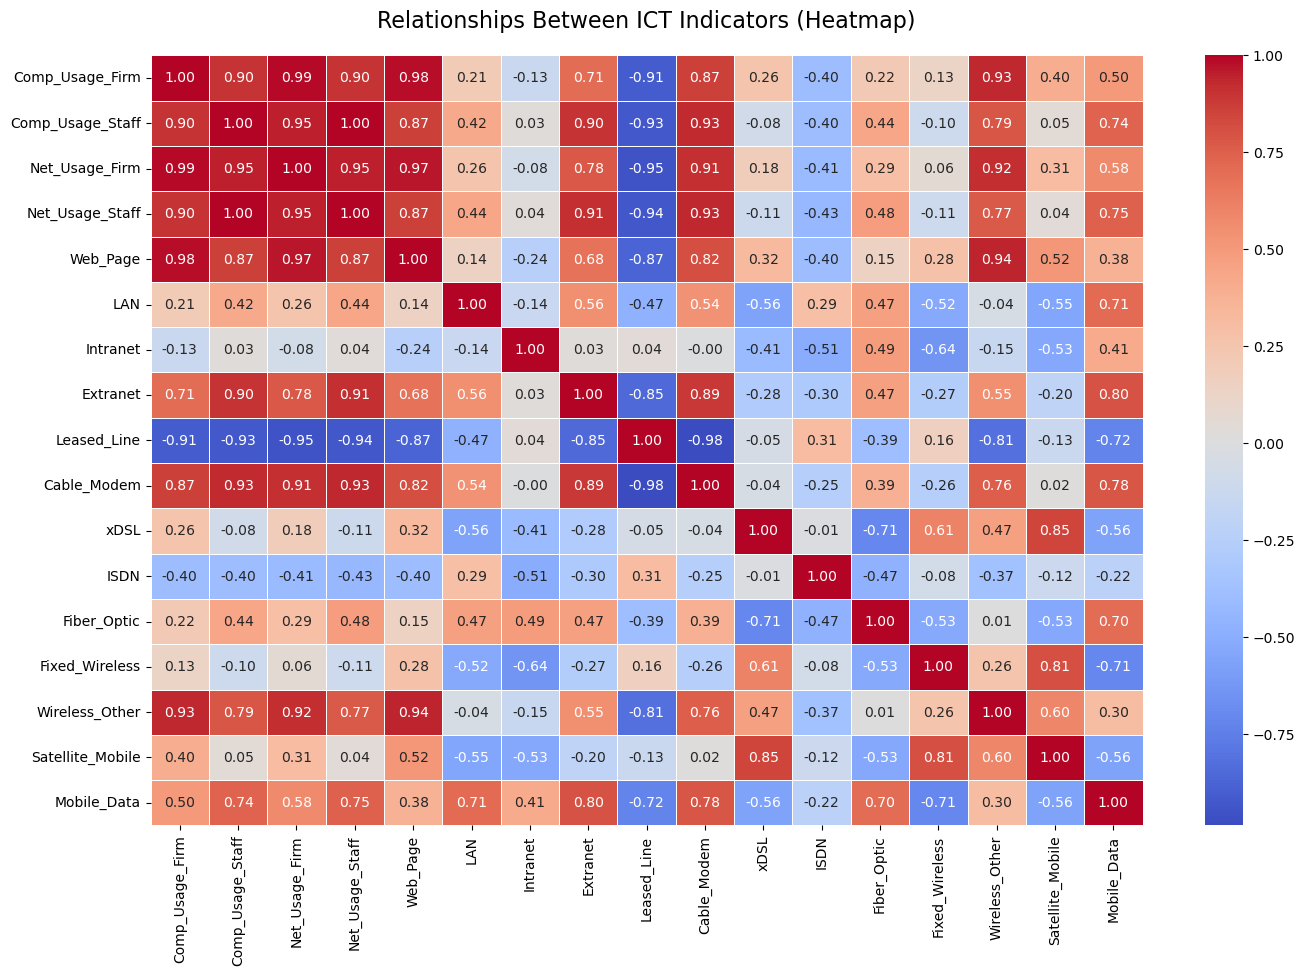

In [37]:
plt.figure(figsize=(16, 10))

corr_matrix = df.drop(columns=['Year', 'ICT_Net_Total', 'Conn_Type_Total']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Relationships Between ICT Indicators (Heatmap)', fontsize=16, pad=20)
plt.show()

### The correlation heatmap shows a very strong positive relationship (0.97) between Net_Usage_Firm (internet usage) and Web_Page (having a website).
### This result indicates that as internet availability increases, companies are much more likely to create and maintain a website, showing a direct and synchronized growth between infrastructure access and online presence.

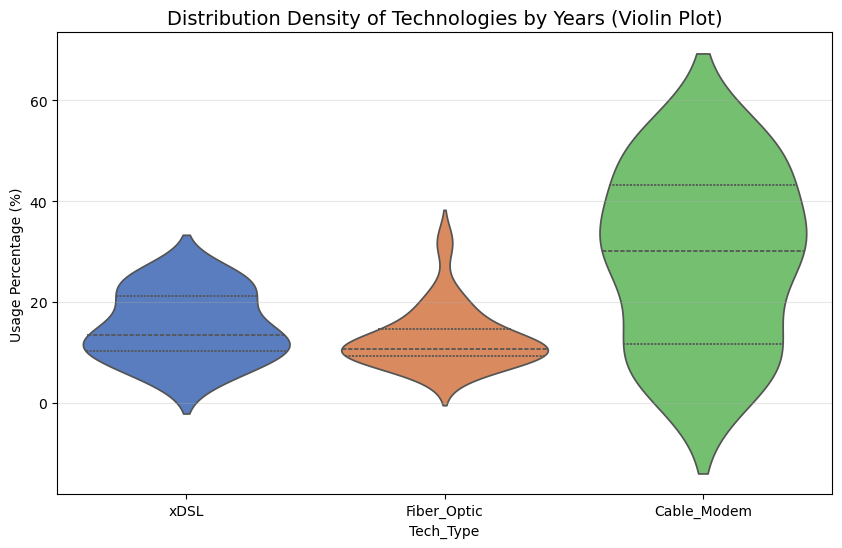

In [48]:
tech_cols = ['xDSL', 'Fiber_Optic', 'Cable_Modem']
df_melted = df.melt(id_vars=['Year'], value_vars=tech_cols, var_name='Tech_Type', value_name='Percentage')

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_melted, x='Tech_Type', y='Percentage', palette='muted', hue='Tech_Type', legend=False, inner='quartile')

plt.title('Distribution Density of Technologies by Years (Violin Plot)', fontsize=14)
plt.ylabel('Usage Percentage (%)')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Based on the violin plots, we observe that xDSL and Cable Modem technologies act as the “backbone” of Azerbaijan’s digital infrastructure, showing a stable and consistent distribution over the years.
### In contrast, the wide spread in the Fiber Optic violin indicates rapid adoption in recent years, suggesting that this technology is entering a mass-use phase and gradually replacing traditional connection types.